In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 6)

## The Boostrap Principle

We have an estimate $\hat{\theta}$ for a parameter $\theta$ an want to know how accurate $\hat{\theta}$: we would like to find $SE(\hat{\theta})$ or give a confidence interval for $\theta$.

The boostrap can do this in quite general settings.

Example: $\theta = $ average height of all people in the US.

$\theta$ is unknown but can be estimated by the average height $\hat{\theta}$ of 100 randomly selected people.

This illustrates the **plug-in principle**:

We can't compute the population mean because we can't access the whole population. So we 'plug in' the sample in place of the population and compute the mean of the sample instead.

The rationale for the plug-in principle is that the sample mean $\hat{\theta}$ will be close to the population mean $\hat{\theta}$ because the sample histogram is close to the population histogram.

'black'

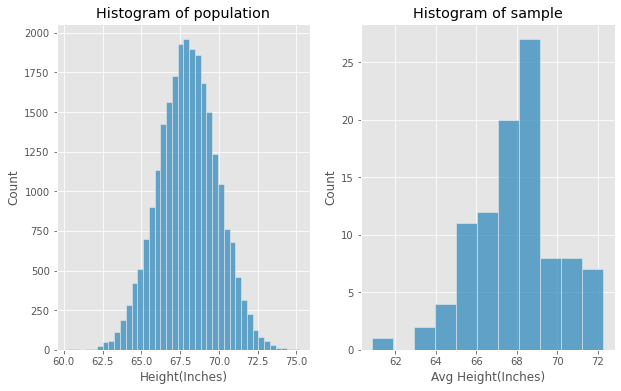

In [6]:

population = pd.read_csv("../data/heights_weights.csv")['Height(Inches)']
samples_avg = pd.Series(population.sample(100), name='Avg Height(Inches)')
fix, ax = plt.subplots(1,2)
_ = sns.histplot(population, bins=40, ax=ax[0]).set_title("Histogram of population")
_ = sns.histplot(samples_avg, bins=11,ax=ax[1]).set_title("Histogram of sample")

The boostrap uses the plug-in principle and the Monte Carlo Method to approximate quantities such as $SE(\hat{\theta})$.

Here is the reasoning behind the boostrap:

Suppose we can draw as many samples from the population as we wish. Then we can approximate $SE(\hat{\theta})$ with Monte Carlo:

* Draw a sample $X_1,...,X_n$ and use it to compute $\hat{\theta}$.

* Repeat B times (say B=1,000) to get $\hat{\theta}_1,....,\hat{\theta}_B$.

* The standard deviation of these B estimates is close to $SE(\hat{\theta})$ if B is large, by the law of large numbers.

**However**, **we** have only one sample $X_1,...,X_n$ and we can't simulate more because the population is not accessible.

The boostrap uses the plug-in principle to get around this: It simulates from the sample instead of from the population.

The boostrap pretends that the sample histogram is the population histogram and the uses Monte Carlo to simulate the quantity of interest.

Simulating a boostrap sample $X_1^*,...,X_n^*$ means that we draw $n$ times with replacement from $X_1,..., X_n$.

The boostrap consists of two steps:

* Draw B boostrap samples and compute $\hat{\theta}^*$ for each boostrap sample:

$X_1^{*1}, ..., X_n^{*1} \rightarrow \hat{\theta}_1^*$<br>
$~~~~~.$<br>
$~~~~~.$<br>
$~~~~~.$<br>
$X_1^{*B}, ..., X_n^{*B} \rightarrow \hat{\theta}_B^*$
